In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
# Define column names
columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkphos', 
           'Sgpt', 'Sgot', 'Total_Proteins', 'Albumin', 'Albumin_Globulin_Ratio', 'Selector']

# Specify the local file path (update this with your actual path)
file_path = r"C:\Users\Ayush J\OneDrive\Desktop\IDS\ILPD.csv"

# Load the dataset
try:
    liver = pd.read_csv(file_path, header=None, names=columns)
    print("Dataset loaded successfully!")
except FileNotFoundError as e:
    print(f"Error: File not found. Please check the file path.\nDetails: {e}")
except Exception as e:
    print(f"An error occurred while loading the dataset.\nDetails: {e}")

# Display the first few rows of the dataset
print(liver.head())

Dataset loaded successfully!
   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkphos  Sgpt  Sgot  \
0   65  Female              0.7               0.1      187    16    18   
1   62    Male             10.9               5.5      699    64   100   
2   62    Male              7.3               4.1      490    60    68   
3   58    Male              1.0               0.4      182    14    20   
4   72    Male              3.9               2.0      195    27    59   

   Total_Proteins  Albumin  Albumin_Globulin_Ratio  Selector  
0             6.8      3.3                    0.90         1  
1             7.5      3.2                    0.74         1  
2             7.0      3.3                    0.89         1  
3             6.8      3.4                    1.00         1  
4             7.3      2.4                    0.40         1  


# Data Exploration

In [6]:
# Check for missing values
print("Missing values in each column:")
print(liver.isnull().sum())

# Basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(liver.describe())

# Check the data types of columns
print("\nData types of columns:")
print(liver.dtypes)

# Value counts for the target column (Selector)
print("\nValue counts for the target column:")
print(liver['Selector'].value_counts())


Missing values in each column:
Age                       0
Gender                    0
Total_Bilirubin           0
Direct_Bilirubin          0
Alkphos                   0
Sgpt                      0
Sgot                      0
Total_Proteins            0
Albumin                   0
Albumin_Globulin_Ratio    4
Selector                  0
dtype: int64

Basic statistics of the dataset:
              Age  Total_Bilirubin  Direct_Bilirubin      Alkphos  \
count  583.000000       583.000000        583.000000   583.000000   
mean    44.746141         3.298799          1.486106   290.576329   
std     16.189833         6.209522          2.808498   242.937989   
min      4.000000         0.400000          0.100000    63.000000   
25%     33.000000         0.800000          0.200000   175.500000   
50%     45.000000         1.000000          0.300000   208.000000   
75%     58.000000         2.600000          1.300000   298.000000   
max     90.000000        75.000000         19.700000  2110.000

# Data Cleaning

In [9]:
# Replace missing values in 'Albumin_Globulin_Ratio' with the mean of the column
liver['Albumin_Globulin_Ratio'] = liver['Albumin_Globulin_Ratio'].fillna(liver['Albumin_Globulin_Ratio'].mean())

# Verify again for missing values
print("\nMissing values after handling:")
print(liver.isnull().sum())


Missing values after handling:
Age                       0
Gender                    0
Total_Bilirubin           0
Direct_Bilirubin          0
Alkphos                   0
Sgpt                      0
Sgot                      0
Total_Proteins            0
Albumin                   0
Albumin_Globulin_Ratio    0
Selector                  0
dtype: int64


# Encoding Categorical Variables

In [12]:
# Encode the 'Gender' column (Female -> 0, Male -> 1)
liver['Gender'] = liver['Gender'].map({'Female': 0, 'Male': 1})

# Verify the encoding
print("\nUnique values in the 'Gender' column after encoding:")
print(liver['Gender'].unique())


Unique values in the 'Gender' column after encoding:
[0 1]


# Feature and Target Split

In [15]:
# Features and target variable
X = liver.drop(columns=['Selector'])  # All columns except 'Selector'
y = liver['Selector']  # Target column

# Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and testing data shapes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")



Training and testing data shapes:
X_train: (466, 10), X_test: (117, 10)
y_train: (466,), y_test: (117,)


# Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the training and testing features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Evaluation:
Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.92      0.85        87
           2       0.56      0.30      0.39        30

    accuracy                           0.76       117
   macro avg       0.68      0.61      0.62       117
weighted avg       0.73      0.76      0.73       117


Confusion Matrix:
[[80  7]
 [21  9]]


In [26]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, rf_y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))



Random Forest Model Evaluation:
Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.86      0.82        87
           2       0.45      0.33      0.38        30

    accuracy                           0.73       117
   macro avg       0.62      0.60      0.60       117
weighted avg       0.70      0.73      0.71       117


Confusion Matrix:
[[75 12]
 [20 10]]


C:\Users\Ayush J\AppData\Local\Temp\ipykernel_45568\4250063185.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")


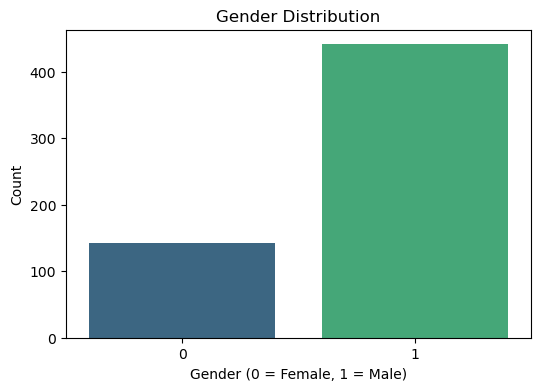

In [28]:
# Gender distribution
gender_counts = liver['Gender'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")
plt.title("Gender Distribution")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()


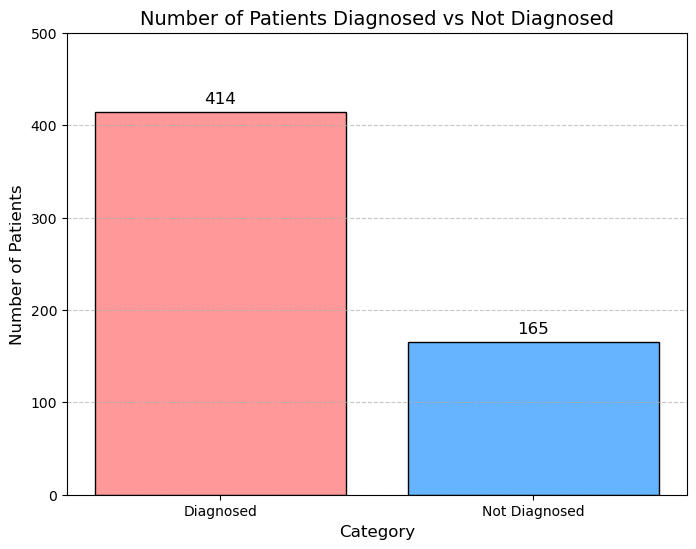

In [30]:
import matplotlib.pyplot as plt

# Data
categories = ['Diagnosed', 'Not Diagnosed']
values = [414, 165]
colors = ['#ff9999', '#66b3ff']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=colors, edgecolor='black')
plt.title('Number of Patients Diagnosed vs Not Diagnosed', fontsize=14)
plt.ylabel('Number of Patients', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.ylim(0, 500)
for i, v in enumerate(values):
    plt.text(i, v + 10, str(v), ha='center', fontsize=12)  # Annotating the bars
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [32]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

NameError: name 'data' is not defined

<Figure size 1000x800 with 0 Axes>

In [ ]:
# Plot histograms for each numeric column
liver.hist(bins=20, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

In [ ]:
# Pie chart for target variable
selector_counts = data['Selector'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(selector_counts, labels=selector_counts.index, autopct="%1.1f%%", startangle=140, colors=["skyblue", "orange"])
plt.title("Selector Class Distribution")
plt.show()


In [ ]:
# Boxplots for numeric features
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data[col], color='cyan')
    plt.title(col)
plt.tight_layout()
plt.show()


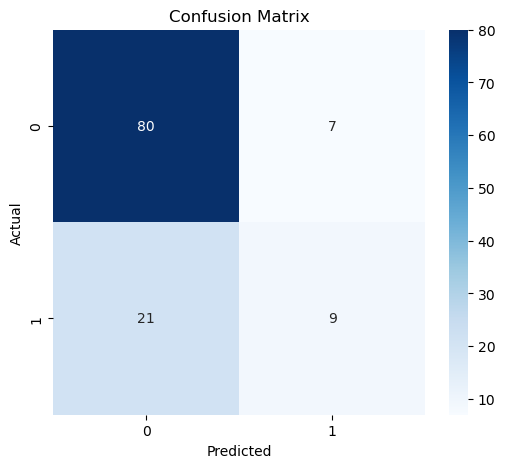

In [37]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


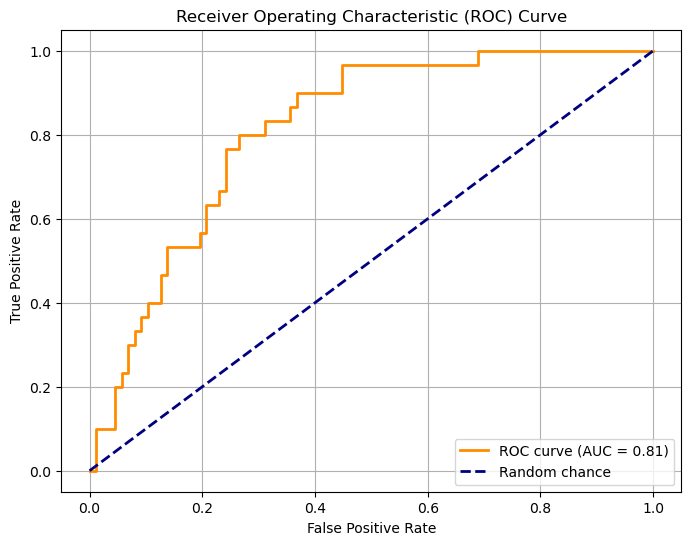

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Specify the positive label as 2 (if 2 represents the positive class)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label=2)  # Specify the positive label
roc_auc = auc(fpr, tpr)  # Compute AUC

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


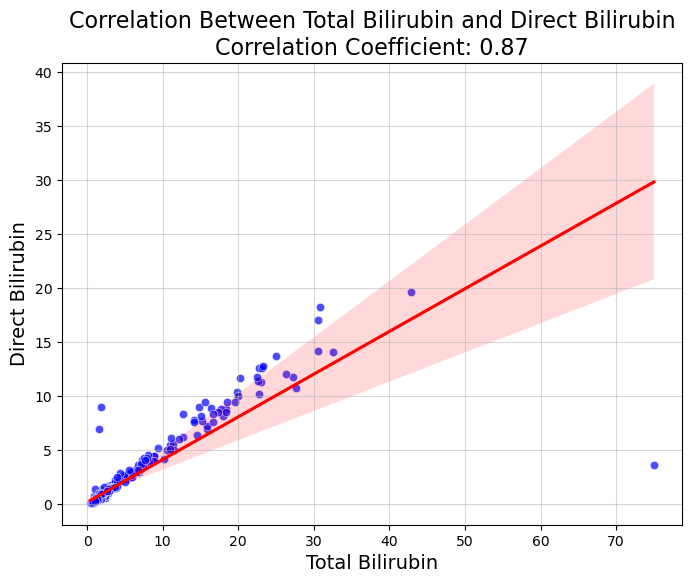

In [55]:
# Scatter plot for Total Bilirubin vs Direct Bilirubin
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_Bilirubin', y='Direct_Bilirubin', data=liver, color='blue', alpha=0.7)

# Add a regression line to indicate the relationship
sns.regplot(x='Total_Bilirubin', y='Direct_Bilirubin', data=liver, scatter=False, color='red')

# Calculate and display the correlation coefficient
correlation = np.corrcoef(liver['Total_Bilirubin'], liver['Direct_Bilirubin'])[0, 1]
plt.title(f'Correlation Between Total Bilirubin and Direct Bilirubin\nCorrelation Coefficient: {correlation:.2f}', fontsize=16)
plt.xlabel('Total Bilirubin', fontsize=14)
plt.ylabel('Direct Bilirubin', fontsize=14)
plt.grid(alpha=0.5)
plt.show()


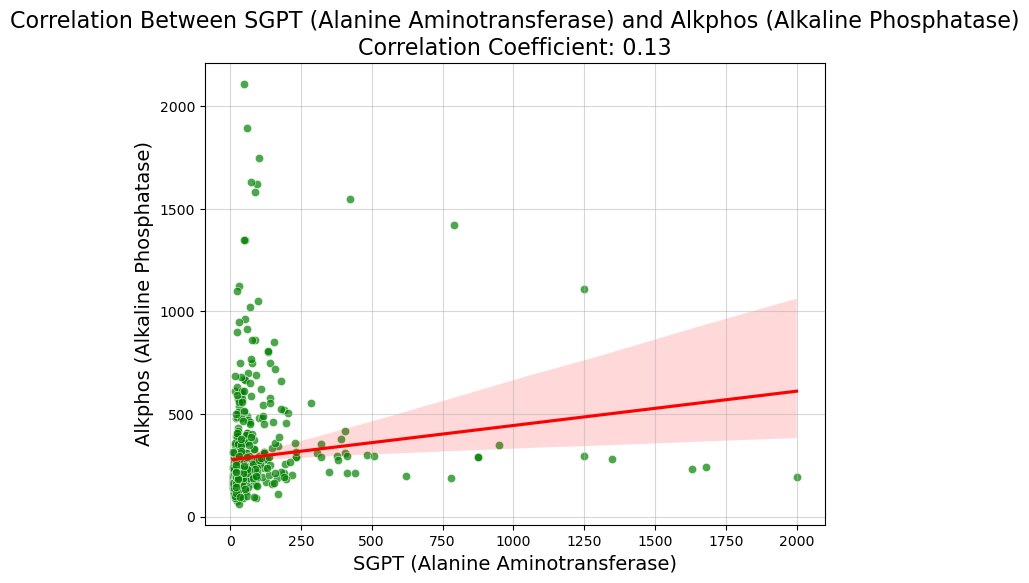

In [57]:
# Scatter plot for SGPT vs Alkphos
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sgpt', y='Alkphos', data=liver, color='green', alpha=0.7)

# Add a regression line
sns.regplot(x='Sgpt', y='Alkphos', data=liver, scatter=False, color='red')

# Calculate and display the correlation coefficient
correlation = np.corrcoef(liver['Sgpt'], liver['Alkphos'])[0, 1]
plt.title(f'Correlation Between SGPT (Alanine Aminotransferase) and Alkphos (Alkaline Phosphatase)\nCorrelation Coefficient: {correlation:.2f}', fontsize=16)
plt.xlabel('SGPT (Alanine Aminotransferase)', fontsize=14)
plt.ylabel('Alkphos (Alkaline Phosphatase)', fontsize=14)
plt.grid(alpha=0.5)
plt.show()

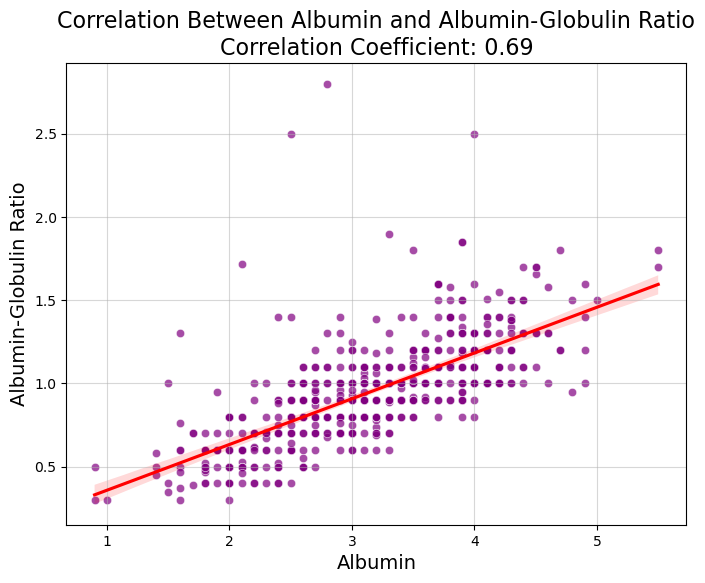

In [59]:
liver# Scatter plot for Albumin vs Albumin-Globulin Ratio
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Albumin', y='Albumin_Globulin_Ratio',  data=liver, color='purple', alpha=0.7)

# Add a regression line
sns.regplot(x='Albumin', y='Albumin_Globulin_Ratio', data=liver, scatter=False, color='red')

# Calculate and display the correlation coefficient
correlation = np.corrcoef(liver['Albumin'], liver['Albumin_Globulin_Ratio'])[0, 1]
plt.title(f'Correlation Between Albumin and Albumin-Globulin Ratio\nCorrelation Coefficient: {correlation:.2f}', fontsize=16)
plt.xlabel('Albumin', fontsize=14)
plt.ylabel('Albumin-Globulin Ratio', fontsize=14)
plt.grid(alpha=0.5)
plt.show()

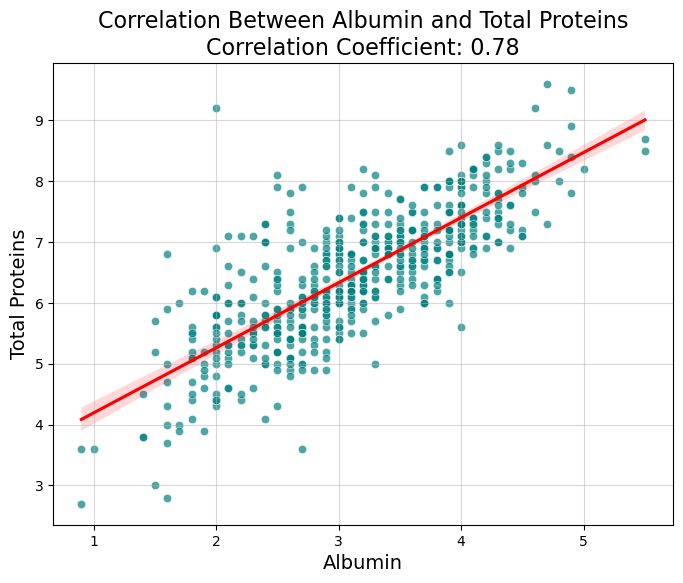

In [61]:
# Scatter plot for Albumin vs Total Proteins
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Albumin', y='Total_Proteins', data=liver, color='teal', alpha=0.7)

# Add a regression line
sns.regplot(x='Albumin', y='Total_Proteins', data=liver, scatter=False, color='red')

# Calculate and display the correlation coefficient
correlation = np.corrcoef(liver['Albumin'], liver['Total_Proteins'])[0, 1]
plt.title(f'Correlation Between Albumin and Total Proteins\nCorrelation Coefficient: {correlation:.2f}', fontsize=16)
plt.xlabel('Albumin', fontsize=14)
plt.ylabel('Total Proteins', fontsize=14)
plt.grid(alpha=0.5)
plt.show()

In [65]:

# Split the data into features (X) and labels (y)
X = liver.iloc[:, :-1].values  # All columns except the last
y = liver.iloc[:, -1].values   # The last column

# Define the logistic regression model
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_epochs=1000):
        """
        Initialize the logistic regression model with given parameters.
        :param learning_rate: Learning rate for gradient descent.
        :param num_epochs: Number of iterations to train the model.
        """
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

    def sigmoid(self, z):
        """
        Compute the sigmoid function.
        :param z: Input value or array.
        :return: Sigmoid of z.
        """
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        Train the logistic regression model using gradient descent.
        :param X: Training features.
        :param y: Training labels.
        """
        # Initialize weights to zeros
        self.weights = np.zeros(X.shape[1])

        # Perform gradient descent for num_epochs iterations
        for epoch in range(self.num_epochs):
            z = np.dot(X, self.weights)           # Linear combination of weights and features
            predictions = self.sigmoid(z)        # Apply sigmoid to compute probabilities
            error = y - predictions              # Compute the error
            gradient = np.dot(X.T, error) / X.shape[0]  # Gradient calculation
            self.weights += self.learning_rate * gradient  # Update weights

    def predict(self, X):
        """
        Make predictions using the trained logistic regression model.
        :param X: Test features.
        :return: Predicted labels (0 or 1).
        """
        z = np.dot(X, self.weights)              # Linear combination
        predictions = self.sigmoid(z)           # Apply sigmoid to compute probabilities
        return np.round(predictions)            # Convert probabilities to binary (0 or 1)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(liver))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train the logistic regression model
model = LogisticRegression(learning_rate=0.01, num_epochs=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Output the predictions (optional)
print("Predictions:", predictions)

Predictions: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [73]:
prediction = model.predict(X_test)
accuracy = np.mean(prediction == y_test)
print(f'Accuracy:{accuracy * 100: .2f}%')

Accuracy: 73.50%


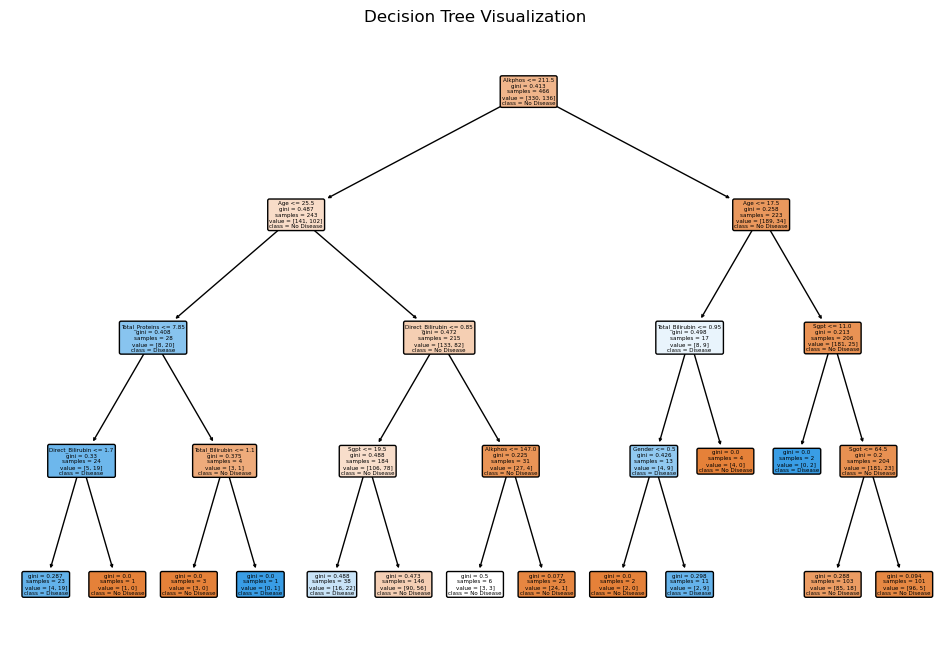

In [75]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
decision_tree.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree,
          feature_names=liver.columns[:-1],  # Use the feature names from the dataset
          class_names=['No Disease', 'Disease'],  # Label the classes
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()
